In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

import nn4n
# from nn4n.structures import *
# from nn4n.models.CTRNN import *

ModuleNotFoundError: No module named 'nn4n'

In [7]:
import sys
print(sys.executable)

/usr/local/bin/python3.9


## CTRNN under default settings

Linear Layer: 
   | in_size:    1
   | out_size:   100
   | dist:       uniform
   | bias:       False
   | shape:      torch.Size([100, 1])
   | weight_min: -0.9909008741378784
   | weight_max: 0.9943761825561523
   | bias_min:   0.0
   | bias_max:   0.0
   | sparsity:   None



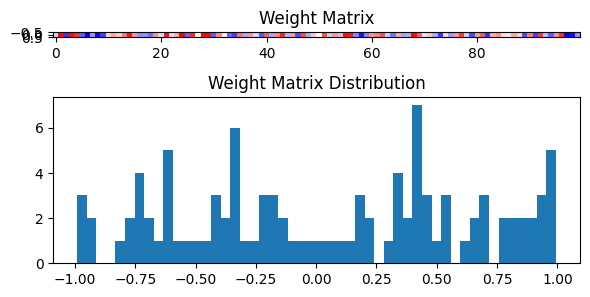

Recurrence: 
   | recurrent_noise: 0.05
   | activation:      relu
   | alpha:           1.0

Hidden Layer: 
   | self_connections: False
   | spec_rad:         1
   | in_size:          100
   | out_size:         100
   | distribution:     normal
   | bias:             False
   | dale:             False
   | shape:            torch.Size([100, 100])
   | weight_min:       -0.37618207931518555
   | weight_max:       0.39874494075775146
   | weight_mean:      0.0003732891636900604
   | bias_min:         0.0
   | bias_max:         0.0
   | sparsity:         0.99
   | spectral_radius:  1.0



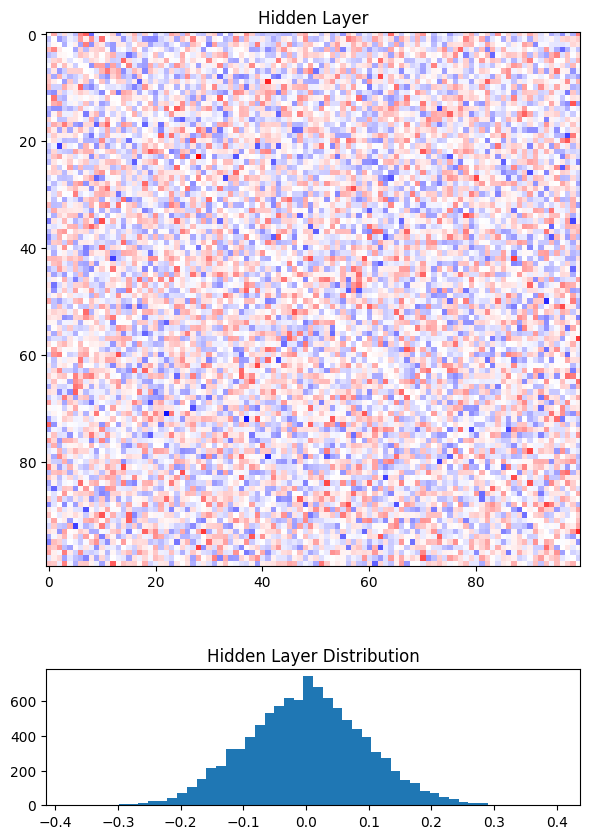

Linear Layer: 
   | in_size:    100
   | out_size:   1
   | dist:       uniform
   | bias:       False
   | shape:      torch.Size([1, 100])
   | weight_min: -0.09894236922264099
   | weight_max: 0.09819169342517853
   | bias_min:   0.0
   | bias_max:   0.0
   | sparsity:   None



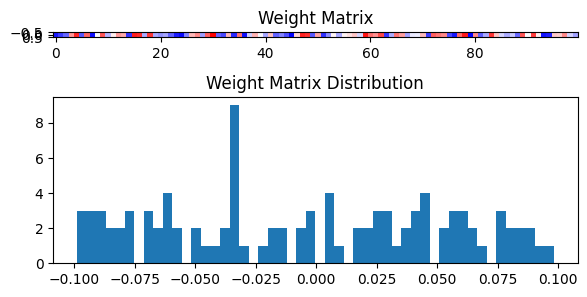

In [47]:
rnn = CTRNN()
rnn.print_model()

## Positive value only in the hidden layer

In [3]:
rnn = CTRNN(allow_neg=[True, False, True])
rnn.print_model()

NameError: name 'CTRNN' is not defined

## Train on a simple sin wave prediction task

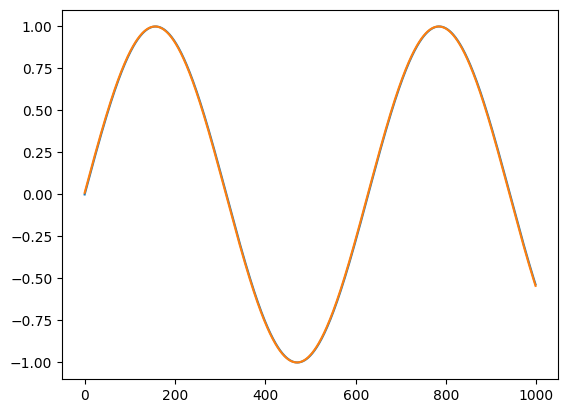

In [63]:
# predict sin wave

inputs = np.sin(np.linspace(0, 10, 1000))
inputs = torch.from_numpy(inputs).float().unsqueeze(1).unsqueeze(1)
labels = inputs[1:]
inputs = inputs[:-1]

plt.plot(inputs.squeeze(1).squeeze(1).numpy())
plt.plot(labels.squeeze(1).squeeze(1).numpy())
plt.show()

In [73]:
rnn = CTRNN(input_size=1, hidden_size=10, output_size=1)
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.001)

losses = []
for epoch in range(500):
    outputs, _ = rnn(inputs)
    loss = torch.nn.MSELoss()(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 100 == 0:
        print(f'Epoch {epoch} Loss {loss.item()}')


Epoch 0 Loss 0.09733487665653229
Epoch 100 Loss 0.001616657362319529
Epoch 200 Loss 0.0015591393457725644
Epoch 300 Loss 0.0014717784943059087
Epoch 400 Loss 0.001451420714147389
